# **Task 1**



- Read the edf file
- Show all metadata with channels and sampling frequency
- Convert it to dataframe
- Plot the entire data.
- Take a segment from the dataframe say, 5th second from 2nd EEG channel and   plot them

In [1]:
import os 
import sys
import time
import math
import re 
import datetime
from datetime import datetime, timedelta
import logging
import shutil
import copy 

from pprint import pprint

import numpy as np 
import pandas as pd 
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn



In [2]:
from google.colab import drive
from google.colab import files
drive_name = '/content/gdrive'
drive.mount(drive_name, force_remount=True)

Mounted at /content/gdrive


In [3]:
### Setting up all paths 
proj_root_dir = f'{drive_name}/MyDrive/Sahid\'s Work/Test Tasks/chb01_03.edf'
#proj_root_dir = f'{drive_name}/MyDrive/Personal/Research/HSTU BioMed1 Research/Sahid\'s Work/Test Tasks/chb01_03.edf'

# **Raw Data Management Functions: Load, Save, Column Delete, Column Reorder and Preprocess** 

In [4]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 4.7 MB/s 


In [5]:
import mne

## **Loading Raw EEG Data**

In [6]:
data = mne.io.read_raw_edf(proj_root_dir)

Extracting EDF parameters from /content/gdrive/MyDrive/Sahid's Work/Test Tasks/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-b26359d0076b>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(proj_root_dir)


In [7]:
raw_data = data.get_data()
channels = data.ch_names

# **Showing Metadata**

In [8]:
data_info = data.__dict__
data_info

{'_annotations': <Annotations | 0 segments>,
 '_cals': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]),
 '_comp': None,
 '_cropped_samp': 0,
 '_dtype_': numpy.float64,
 '_filenames': ["/content/gdrive/MyDrive/Sahid's Work/Test Tasks/chb01_03.edf"],
 '_first_samps': array([0]),
 '_init_kwargs': {'eog': None,
  'exclude': (),
  'include': None,
  'infer_types': False,
  'input_fname': "/content/gdrive/MyDrive/Sahid's Work/Test Tasks/chb01_03.edf",
  'misc': None,
  'preload': False,
  'stim_channel': 'auto',
  'verbose': None},
 '_last_samps': array([921599]),
 '_orig_units': {'C3-P3': 'µV',
  'C4-P4': 'µV',
  'CZ-PZ': 'µV',
  'F3-C3': 'µV',
  'F4-C4': 'µV',
  'F7-T7': 'µV',
  'F8-T8': 'µV',
  'FP1-F3': 'µV',
  'FP1-F7': 'µV',
  'FP2-F4': 'µV',
  'FP2-F8': 'µV',
  'FT10-T8': 'µV',
  'FT9-FT10': 'µV',
  'FZ-CZ': 'µV',
  'P3-O1': 'µV',
  'P4-O2': 'µV',
  'P7-O1': 'µV',
  'P7-T7': 'µV',
  'P8-O2': 'µV',
  'T7-FT9': 'µV',
  'T7-P7':

In [9]:
data_info['info']['sfreq'] #['_raw_extras']#['sfreq']

256.0

# **Showing Original Dataframe**

In [10]:
df = data.to_data_frame()
df

,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000000,-17.777778,39.267399,-3.711844,8.400488,-0.586081,4.102564,37.704518,-15.042735,-17.387057,...,-106.862027,-59.975580,180.317460,-18.559219,85.372405,4.102564,20.903541,-9.181929,-39.658120,-59.975580
1,0.003906,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
2,0.007812,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
3,0.011719,0.586081,0.195360,0.195360,0.195360,0.195360,0.195360,0.586081,-0.195360,0.195360,...,-0.976801,0.195360,2.148962,0.586081,0.586081,0.195360,1.367521,-0.195360,-0.195360,0.195360
4,0.015625,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,2.148962,0.195360,0.195360,0.195360,-0.195360,0.195360,0.195360,0.195360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,3599.980469,-33.797314,-39.658120,63.492063,23.638584,15.042735,-27.545788,20.122100,5.274725,16.605617,...,78.339438,-1.367521,-51.379731,13.479853,-31.062271,-63.101343,-5.665446,88.107448,47.863248,-1.367521
921596,3599.984375,-27.545788,-26.764347,65.054945,10.354090,22.857143,-11.916972,18.559219,-9.181929,26.373626,...,89.670330,9.963370,-69.352869,26.373626,-26.764347,-64.664225,-4.884005,79.120879,48.644689,9.963370
921597,3599.988281,-17.777778,-23.247863,59.194139,14.652015,34.188034,-2.539683,9.181929,-9.181929,30.671551,...,77.167277,19.340659,-45.128205,22.466422,-25.982906,-58.803419,8.009768,48.644689,43.565324,19.340659
921598,3599.992188,-8.791209,-22.466422,60.366300,11.916972,42.393162,2.930403,14.652015,-19.731380,35.750916,...,63.101343,26.373626,-27.936508,24.420024,-18.559219,-59.975580,25.982906,27.936508,38.485958,26.373626


# **Retrieving and ploting specific data from dataframe**

In [11]:
slice1_df = df.iloc[256*2:256*4, 1:2]
slice1_df

,FP1-F7
512,0.195360
513,-8.400488
514,-16.605617
515,-27.155067
516,-37.313797
...,...
1019,-7.228327
1020,-4.884005
1021,-2.539683
1022,-2.539683


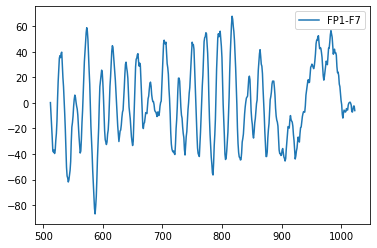

In [12]:
slice1_df.plot()

In [13]:
type(slice1_df)

pandas.core.frame.DataFrame

In [14]:
slice1_df.values.T[0].tolist()

[0.19536019536019467,
 -8.400488400488399,
 -16.605616605616607,
 -27.15506715506715,
 -37.313797313797316,
 -38.485958485958484,
 -36.92307692307692,
 -39.65811965811965,
 -37.313797313797316,
 -29.4993894993895,
 -24.02930402930403,
 -14.261294261294262,
 3.3211233211233204,
 16.605616605616603,
 25.982905982905983,
 34.96947496947496,
 36.92307692307691,
 35.36019536019536,
 38.87667887667887,
 39.65811965811965,
 29.499389499389494,
 19.731379731379732,
 12.698412698412698,
 2.9304029304029293,
 -8.400488400488399,
 -20.512820512820515,
 -35.75091575091575,
 -50.2075702075702,
 -57.24053724053724,
 -58.80341880341879,
 -61.92918192918192,
 -60.366300366300365,
 -56.84981684981685,
 -52.94261294261294,
 -45.90964590964591,
 -30.28083028083028,
 -18.94993894993895,
 -15.433455433455434,
 -10.354090354090355,
 -2.5396825396825404,
 2.9304029304029293,
 6.056166056166055,
 4.493284493284492,
 0.5860805860805853,
 -2.5396825396825404,
 -4.884004884004884,
 -9.572649572649572,
 -18.16849

In [15]:
slice2_df = df.iloc[256*0: 256*1, [1, 3, 7]]
slice2_df

,FP1-F7,T7-P7,C3-P3
0,-17.777778,-3.711844,37.704518
1,0.195360,0.195360,0.195360
2,0.195360,0.195360,0.195360
3,0.586081,0.195360,0.586081
4,0.195360,0.195360,0.195360
...,...,...,...
251,19.340659,-18.559219,0.586081
252,21.294261,-22.466422,8.009768
253,25.982906,-29.108669,1.758242
254,33.015873,-31.062271,-2.930403


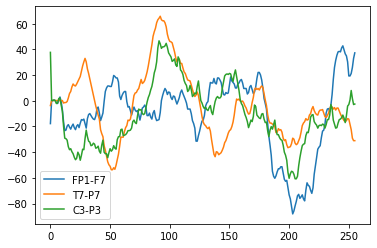

In [16]:
slice2_df.plot()

# **Information of the EEG Data**

In [17]:
data

<RawEDF | chb01_03.edf, 23 x 921600 (3600.0 s), ~27 kB, data not loaded>

In [18]:
print(data)

<RawEDF | chb01_03.edf, 23 x 921600 (3600.0 s), ~27 kB, data not loaded>


In [19]:
print(data.info)

<Info | 7 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-06 13:43:04 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
>


In [20]:
data.info['chs'][0]

{'cal': 1.0,
 'ch_name': 'FP1-F7',
 'coil_type': 1 (FIFFV_COIL_EEG),
 'coord_frame': 4 (FIFFV_COORD_HEAD),
 'kind': 2 (FIFFV_EEG_CH),
 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'logno': 1,
 'range': 1.0,
 'scanno': 1,
 'unit': 107 (FIFF_UNIT_V),
 'unit_mul': 0 (FIFF_UNITM_NONE)}

In [21]:
print(channels)

['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']



## **Visualization of the EEG Data**

Using matplotlib as 2D backend.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


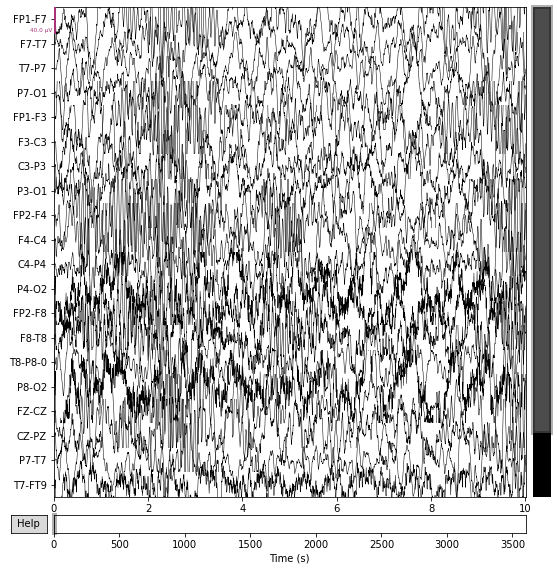

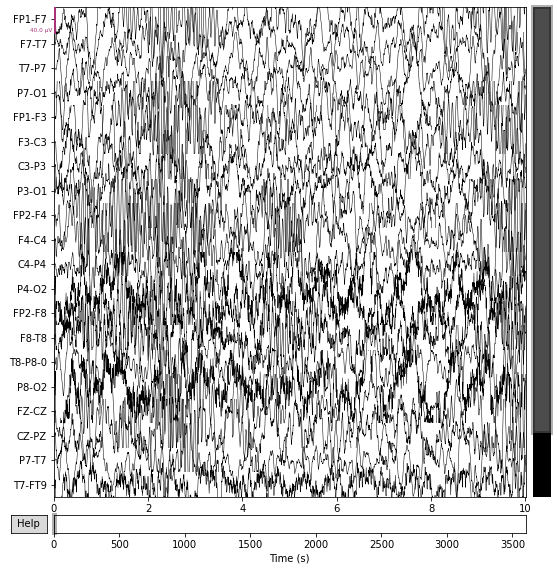

In [22]:
data.plot()

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
<ipython-input-23-cfd892e49e99>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data.plot_psd()


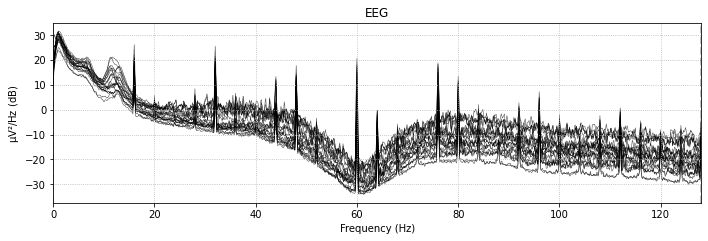

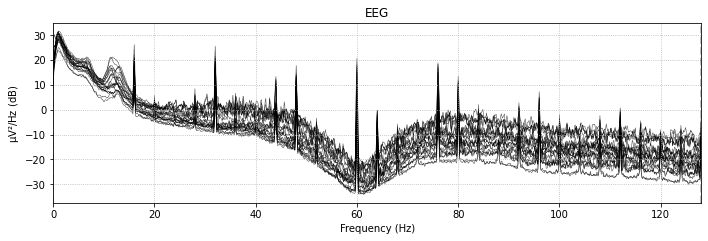

In [23]:
data.plot_psd()

# **Visualization of the sensor location**

In [24]:
#data.plot_sensors(ch_type = 'eeg')

In [25]:
#data.plot_sensors(kind = '3d', ch_type = 'eeg')